## Observations based on the graphs: 
1. Number of data points for Campomulin and Ramicane is the highest compared to all other regimens. This suggests that either a bigger n was included for those groups or that mice within those groups have more datapoints recored. 

2. Male vs. Female distribution of the study seems fairly even therefore it would be interesting to compare the individual drug effects based on gender. 

3. The selected promising drugs Infubinol and Ceftamin have increased in their final tumor volumes which to me suggests that they might not be so great for their antitumor properties as suggested. 

4. The fact that some mice did not reach the final 45 timepoint in the promising drug group means that the drug possibly killed them. If that was the case, they should be excluded from the final graphs for "promising" drugs and included in another data set that shows mortality too. Mixing them in doesn't show the full picture. 

5. The last coorelation value between mouse weight and tumor weight doesn't quite make sense experimentaly. The study started with the exact same tumor weight for all mice (which is not really possible) and we're looking at the average weight of the mouse vs. the tumor size. You can't take the average across all timepoints and assume correlation between weight and tumor volume. You'd have to do a starting weight correlation and ending weight correlation to see whether the weight loss is due to the drug itself or not. A fake assumption could be made here where one can imply that higher weight mean larger tumor volume. 

In [1]:
# Dependencies and Setup 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import scipy.stats as sts
from scipy.stats import linregress
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

In [3]:
# Mouse data file preview 
mouse_metadata = pd.read_csv(mouse_metadata)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# Study data file preview 
study_results = pd.read_csv(study_results)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Data exploration
combined_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [7]:
# Data exploration
combined_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [8]:
# Duplicate drop
combined_df.drop_duplicates(inplace = True)
combined_df.count()

Mouse ID              1892
Drug Regimen          1892
Sex                   1892
Age_months            1892
Weight (g)            1892
Timepoint             1892
Tumor Volume (mm3)    1892
Metastatic Sites      1892
dtype: int64

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen = combined_df.groupby("Drug Regimen")

In [10]:
mean_tumor = pd.DataFrame(regimen["Tumor Volume (mm3)"].mean())
mean_tumor

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.368318
Ramicane,40.216745
Stelasyn,54.233149


In [11]:
median_tumor = pd.DataFrame(regimen["Tumor Volume (mm3)"].median())
median_tumor

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.909965
Ramicane,40.673236
Stelasyn,52.431737


In [12]:
std_tumor = pd.DataFrame(regimen["Tumor Volume (mm3)"].std())
std_tumor

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.502160
Ramicane,4.846308
Stelasyn,7.710419


In [13]:
sem_tumor = pd.DataFrame(regimen["Tumor Volume (mm3)"].sem())
sem_tumor

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.514041
Ramicane,0.320955
Stelasyn,0.573111


In [14]:
# Combining the stats into a dataframe 
stat_summary_df = pd.concat([mean_tumor,median_tumor,std_tumor,sem_tumor],axis=1)
stat_summary_df.reset_index()
stat_summary_df.columns=["Mean Tumor Volume", "Median Tumor Volume", "Std Dev Tumor Volume", "SEM Tumor Volume"]
stat_summary_df.round(2)

,Mean Tumor Volume,Median Tumor Volume,Std Dev Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,
Capomulin,40.68,41.56,4.99,0.33
Ceftamin,52.59,51.78,6.27,0.47
Infubinol,52.88,51.82,6.57,0.49
Ketapril,55.24,53.70,8.28,0.60
Naftisol,54.33,52.51,8.13,0.60
Placebo,54.03,52.29,7.82,0.58
Propriva,52.37,50.91,6.50,0.51
Ramicane,40.22,40.67,4.85,0.32
Stelasyn,54.23,52.43,7.71,0.57


Text(0, 0.5, 'Total Data Points Collected')

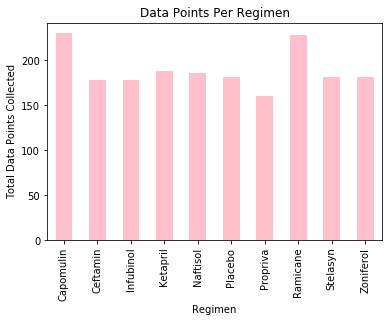

In [15]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
counts = regimen["Tumor Volume (mm3)"].count()
first_bar = counts.plot(kind='bar', color="pink", title = "Data Points Per Regimen")
first_bar.set_xlabel("Regimen")
first_bar.set_ylabel("Total Data Points Collected")

Text(0, 0.5, 'Total Data Points Collected')

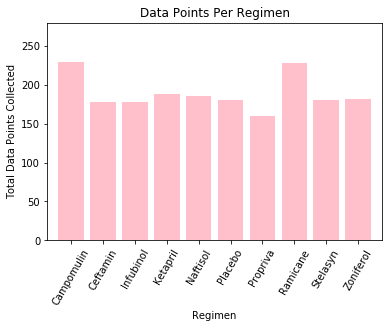

In [16]:
# Bar Plot using pyplot 
counts = regimen["Tumor Volume (mm3)"].count()
counts

y_axis = counts
x_axis = np.arange(len(y_axis))

plt.bar(x_axis, y_axis, color='pink', align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Campomulin", 
                            "Ceftamin", 
                            "Infubinol",
                            "Ketapril",
                            "Naftisol",
                            "Placebo",
                            "Propriva",
                            "Ramicane",
                            "Stelasyn",
                            "Zoniferol"],rotation = 60)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+50)

plt.title("Data Points Per Regimen")
plt.xlabel("Regimen")
plt.ylabel("Total Data Points Collected")

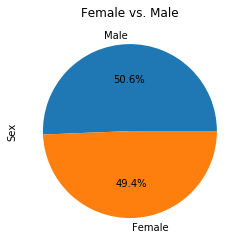

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = combined_df["Sex"].value_counts()
gender.plot(kind='pie', title = "Female vs. Male",autopct='%1.1f%%')
plt.show()

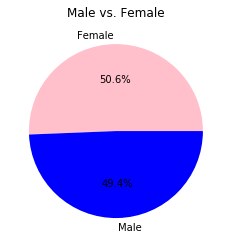

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = combined_df["Sex"].value_counts()

labels = ["Female", "Male"]
colors = ["pink", "blue"]
explode = (0, 0)

plt.pie(gender, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("Male vs. Female")
plt.show()

In [19]:
# Using the max time point 
max_time = combined_df.groupby("Mouse ID")["Timepoint"].max().to_frame().reset_index()
max_time = max_time.merge(combined_df, on= ["Mouse ID", "Timepoint"], how = "inner")
max_time.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [20]:
# Using the last time point for each drug
final_capo = max_time.loc[max_time["Drug Regimen"] == "Capomulin"]
final_rami = max_time.loc[max_time["Drug Regimen"] == "Ramicane"] 
final_infu = max_time.loc[max_time["Drug Regimen"] == "Infubinol"] 
final_ceft = max_time.loc[max_time["Drug Regimen"] == "Ceftamin"]

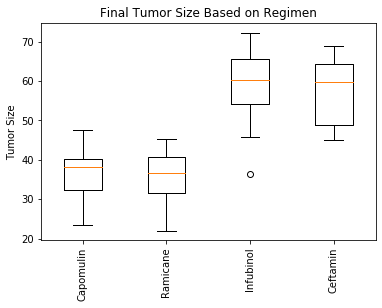

Values below 20.70456164999999 and above 51.83201549 could be outliers for Capomulin.
Values below 17.912664470000003 and above 54.30681135 could be outliers for Ramicane.
Values below 36.83290494999999 and above 82.74144559000001 could be outliers for Infubinol.
Values below 25.355449580000002 and above 87.66645829999999 could be outliers for Ceftamin.


<Figure size 432x288 with 0 Axes>

In [21]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# All four box plots should be within the same figure. 

A = final_capo["Tumor Volume (mm3)"]
B = final_rami["Tumor Volume (mm3)"]
C = final_infu["Tumor Volume (mm3)"]
D = final_ceft["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Size Based on Regimen")
ax1.set_ylabel("Tumor Size")
plt.boxplot([A,B,C,D])
tick_locations = np.arange(1,5)
plt.xticks(tick_locations,["Capomulin","Ramicane","Infubinol","Ceftamin"], rotation="vertical")
plt.show()

quartiles = final_capo["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} and above {upper_bound} could be outliers for Capomulin.")

quartiles = final_rami["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} and above {upper_bound} could be outliers for Ramicane.")

quartiles = final_infu["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} and above {upper_bound} could be outliers for Infubinol.")

quartiles = final_ceft["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} and above {upper_bound} could be outliers for Ceftamin.")

plt.savefig("images/finaltumor.png")

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# mouse number l509
mouse = combined_df.loc[(combined_df["Mouse ID"] == "l509") & (combined_df["Drug Regimen"] == "Capomulin")] 
mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207289,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


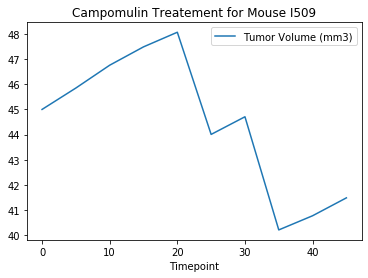

<Figure size 432x288 with 0 Axes>

In [23]:
mouse.plot(kind='line',x='Timepoint',y='Tumor Volume (mm3)', title="Campomulin Treatement for Mouse I509")
plt.show()
plt.savefig("images/campomulin_mouse509.png")

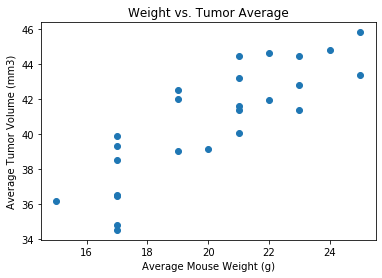

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
drugs = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"] 
avg_drugs = drugs.groupby("Mouse ID").mean()

x_weight = avg_drugs["Weight (g)"]
y_tumor = avg_drugs["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title("Weight vs. Tumor Average")
ax1.set_xlabel("Average Mouse Weight (g)")
ax1.set_ylabel("Average Tumor Volume (mm3)")

plt.scatter(x_weight, y_tumor)
plt.show()

The correlation between mouse weight and the average tumor volume is: 0.84
The r-squared is: 0.7088568047708717


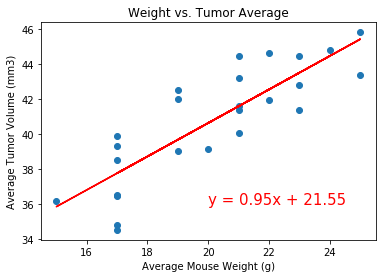

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = avg_drugs["Weight (g)"]
y_values = avg_drugs["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

fig1, ax1 = plt.subplots()
ax1.set_title("Weight vs. Tumor Average")
ax1.set_xlabel("Average Mouse Weight (g)")
ax1.set_ylabel("Average Tumor Volume (mm3)")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

print(f"The correlation between mouse weight and the average tumor volume is: {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("images/weight_tumor.png")